In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Part 1: Prepare the Data

In [2]:
#Read myopia.csv into a Pandas DataFrame.
file = Path('myopia.csv')
df = pd.read_csv(file)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
#Remove the "MYOPIC" column from the dataset.
df2 = df.drop(['MYOPIC'], axis=1)

In [4]:
df2

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [5]:
#Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
scaler = StandardScaler()
X = scaler.fit_transform(df2)
#naming X, as per instructions

# Part 2: Apply Dimensionality Reduction

In [6]:
#Perform dimensionality reduction with PCA. How did the number of the features change?
pca = PCA(n_components=0.90)
#variance set to 90%, as per instructions
pca_transformed_data = pca.fit_transform(X)
pca.explained_variance_ratio_.sum()

0.9616012261171256

In [7]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

df2['x'] = transformed_features[:,0]
df2['y'] = transformed_features[:,1]
df2['class'] = df['MYOPIC']

c:\Users\camer\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [14]:
transformed_features.shape

(618, 2)

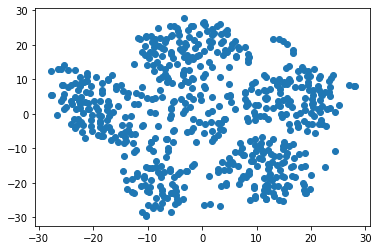

In [8]:
#Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(df2["x"], df2["y"])
plt.show()

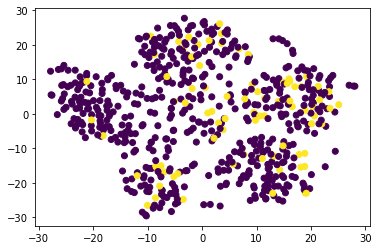

In [9]:
plt.scatter(df2["x"], df2["y"], c=df2["class"])
plt.show()

The two species present in the scatter plot are not distinct at all. Both species are completely incorporated within each other without forming separate clusters.

# Part 3: Perform a Cluster Analysis with K-means


c:\Users\camer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


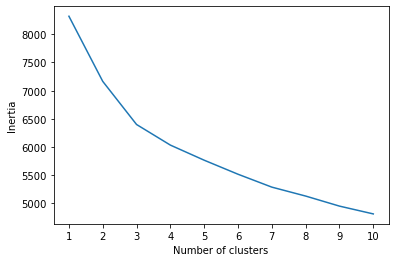

In [10]:
#Create an elbow plot to identify the best number of clusters. Make sure to do the following:
inertia = []
# Same as k = list(range(1, 11))
#k = [1,2,3,4,5,6,7,8,9,10]
k = list(range(1, 11))

#Use a for loop to determine the inertia for each k between 1 through 10.
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_transformed_data)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\camer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


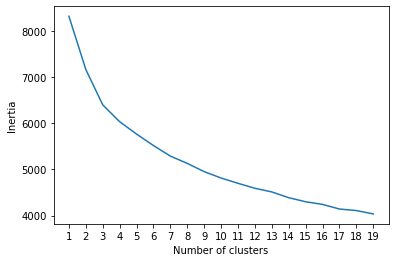

In [11]:
#same as the plot above, but adjusted for a range of 1 to 20 to see if there are any sharp changes in slope that were not seen in the 1 to 10 range.
inertia = []
# Same as k = list(range(1, 11))
#k = [1,2,3,4,5,6,7,8,9,10]
k = list(range(1, 20))

#Use a for loop to determine the inertia for each k between 1 through 10.
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_transformed_data)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,20))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
#If possible, determine where the elbow of the plot is, and at which value of k it appears.

There is no distinct area where the elbow curve sharply flattens out to clearly indicate the location of the k-value. The sharpest change in direction is approximately at k = 3.

# Part 4: Make a Recommendation

In [13]:
#Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?


The patients cannot be clustered because there is no clear indication as to where the k-value truly lies. In order to confidently cluster the patients, the sharp bend in the elbow curve would have to be much more pronounced.
If the patients absolutely must be clustered against the recommendation, k = 3 would be the best place to begin.